In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics import mean_squared_error

In [2]:
# a1 = np.array([1,2,3]); a2 = np.array([4,5,6])
# A = np.column_stack((np.array([1]*3), a1, a2))
# A

In [3]:
# np.linalg.pinv(A.T @ A)

In [4]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [5]:
# Set seed for reproducibility
np.random.seed(1234)

# Generate data
X = np.random.uniform(5, 15, 100)
Y = reg(X) + np.random.normal(0, 5, 100)

# Create DataFrame
Sim_1 = pd.DataFrame({'X': X, 'Y': Y})

In [6]:
# Split into training and testing sets
Train_set = Sim_1.iloc[:80]
Test_set = Sim_1.iloc[80:]

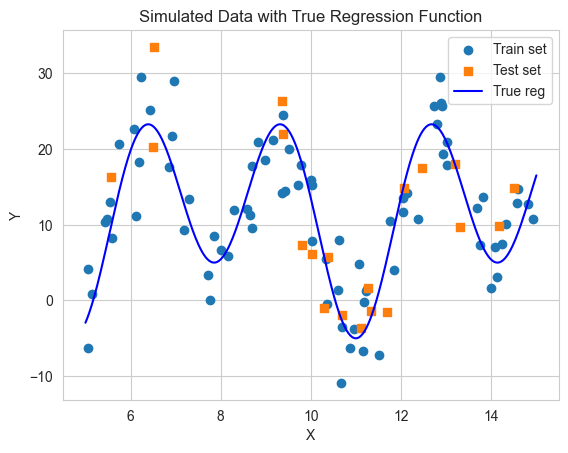

In [7]:
# Plot the training and testing points
plt.scatter(Train_set['X'], Train_set['Y'], marker='o', label='Train set')
plt.scatter(Test_set['X'], Test_set['Y'], marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500); y_curve = reg(x_curve)
plt.plot(x_curve, y_curve, c='blue', label='True reg')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

## Local linear regression from scratch

In [8]:
# Gaussian Kernel
def gaussian(x):
    return np.exp(-0.5*x**2)

# Uniform kernel
def rect(x):
    x = np.array(x)
    return np.where(abs(x) <= 1, 1, 0)

# Traingular kernel
def triangular(x):
    x = np.array(x)
    return np.where(abs(x) <= 1, 1 - abs(x), 0)

In [9]:
def local_reg(x0, X_train, Y_train, kernel = gaussian, h = 0.5):

    n = len(X_train)
    B = np.column_stack(([1]*n, x0 - X_train)) # (x0 - X_train)**2, Add higher degree terms for higher polynomials
    W = np.diag(kernel((x0 - X_train)/h))
    b = np.array([1,0]) # Add 0s to use higher degree polynomials
    
    return b @ np.linalg.pinv(B.T @ W @ B) @ B.T @ W @ Y_train

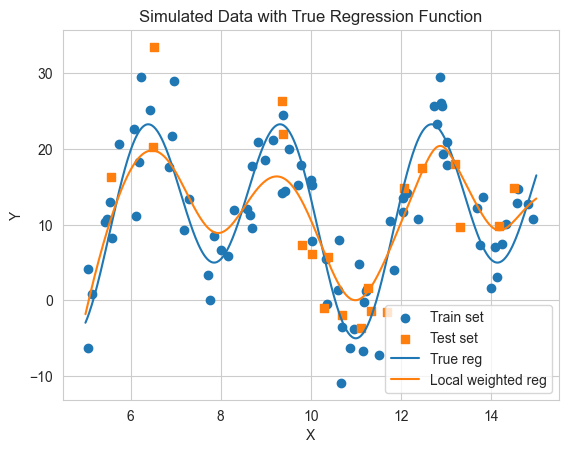

In [10]:
# Plot the training and testing points
plt.scatter(Train_set['X'], Train_set['Y'], marker='o', label='Train set')
plt.scatter(Test_set['X'], Test_set['Y'], marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500)
y_curve = reg(x_curve)
y_curve_local_reg = [local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y'], h = 0.5) for x0 in x_curve]

plt.plot(x_curve, y_curve, label='True reg')
plt.plot(x_curve, y_curve_local_reg, label='Local weighted reg')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

In [11]:
y_train = Train_set['Y']
y_test = Test_set['Y']

h = 0.5

y_pr_trn = np.array([local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y'], h = h) for x0 in Train_set['X']])
y_pr_tst = np.array([local_reg(x0, X_train=Train_set['X'], Y_train=Train_set['Y'], h = h) for x0 in Test_set['X']])

trn_mse = mean_squared_error(y_train, y_pr_trn)
tst_mse = mean_squared_error(y_test, y_pr_tst)

print('Train MSE: ', trn_mse)
print('Test MSE: ', tst_mse)

Train MSE:  23.43305913886987
Test MSE:  32.128934888341846


### Repeat the procedure 50 times and plot the average train and test MSEs for various values of h